# Data Literacy
#### University of Tübingen, Winter Term 2020/21
## Exercise Sheet 5
&copy; 2020 Prof. Dr. Philipp Hennig & Marius Hobbhahn

This sheet is **due on Tuesday 10 December 2020 at 12noon sharp (i.e. before the start of the lecture).**

---

This week's exercise sheet is inspired by a recently viral "Who is talking in popular films" post which you can find [here](https://public.tableau.com/views/WordDataWorking/WhoIsTalking?:language=en&:display_count=y&publish=yes&:origin=viz_share_link&:showVizHome=no)

We want to investigate whether the average user rating of films on [IMDb](https://www.imdb.com) is related to how much of the dialogue is done by male vs female characters. This pop-culture data is a less serious variant of a [data analysis](https://zoonosen.charite.de/fileadmin/user_upload/microsites/m_cc05/virologie-ccm/dateien_upload/Weitere_Dateien/analysis-of-SARS-CoV-2-viral-load-by-patient-age.pdf) problem that was [hotly debated](https://www.bild.de/politik/inland/politik-inland/fragwuerdige-methoden-drosten-studie-ueber-ansteckende-kinder-grob-falsch-70862170.bild.html) in [Germany](https://www.t-online.de/nachrichten/panorama/id_87944112/kampagne-gegen-corona-experten-das-ist-dran-am-bild-artikel-gegen-drosten.html) earlier [this year](https://www.tagesspiegel.de/gesellschaft/medien/schwere-verstoesse-gegen-sorgfaltspflicht-presserat-ruegt-bild-fuer-artikel-ueber-drosten-studie/26179910.html) in the context of the pandemic (the connection will be made clearer in lectures 6 and 7).

The goal of the exercise is to gain an intuition for how to inspect and analyse data without necessarily following a strict statistical recipe. In fact we will see that pre-packaged stats can be dangerous or silly if applied without context, and that sometimes a less formal but richer visual analysis can be more useful.

![title](Who_is_talking_screenshot.png)

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

# Make inline plots vector graphics
%matplotlib inline
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("pdf", "svg")

matplotlib.rc("font", **{"family": "serif", "serif": ["Computer Modern"]})
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsfonts} \usepackage{amsmath}"

# Part I: Data preparation

For this exercise we do the entire data wrangling for you such that you can exclusively focus on the statistical analysis. The data was extracted from the [original tableau datafile](https://public.tableau.com/views/WordDataWorking/WhoIsTalking?:language=en&:display_count=y&publish=yes&:origin=viz_share_link&:showVizHome=no) by us. Everything you need is given in `df_combined` which contains meta data about movies.

In [3]:
# import all .csv files
df_combined = pd.read_csv("df_combined.csv")

In [4]:
print("length of df_combined: ", len(df_combined))
df_combined.head()


length of df_combined:  1996


,Unnamed: 0,script_id,words,words_male,words_female,f_percentage,imdb_id,title,year,gross,lines_data,averageRating,numVotes
0,0,280,6394,2631,3763,0.588520,tt0112579,The Bridges of Madison County,1995,142.0,4.332023e+72,7.6,71178
1,1,623,9108,7584,1524,0.167325,tt0179626,15 Minutes,2001,37.0,7.777778e+127,6.1,47937
2,2,625,4401,4246,155,0.035219,tt0062622,2001: A Space Odyssey,1968,376.0,7.777734e+52,8.3,587725
3,3,630,10132,9059,1073,0.105902,tt0307901,25th Hour,2002,19.0,7.777775e+102,7.6,167856
4,4,633,9029,8163,866,0.095913,tt1019452,A Serious Man,2009,10.0,1.456768e+87,7.0,130750


# Part II: Understanding the data

We begin by visualizing the data in a scatter plot. We recreate the "Who is talking in popular films" scatter plot. 

The necessary components of that plot are percentFemaleDialoge on the x-axis, userRating on the y-axis and two different color schemes for majority male or majority female films. Everything else, such as showing some titles, adapting the size or the marginal plot above is optional. You are also not supposed to filter for films above 200k ratings.

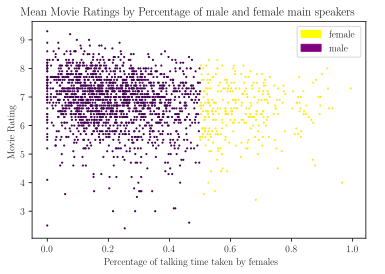

In [5]:
# recreating the "Who is talking in popular films" scatter plot
majority_speaker = df_combined["f_percentage"]> 0.5
import matplotlib.patches as mpatches

yellow_patch = mpatches.Patch(color='yellow', label='female')
purple_patch = mpatches.Patch(color='purple', label='male')

plt.scatter(df_combined.f_percentage, df_combined.averageRating, s=1.5, c= majority_speaker.astype(int))
plt.title("Mean Movie Ratings by Percentage of male and female main speakers")
plt.xlabel("Percentage of talking time taken by females")
plt.ylabel("Movie Rating")
plt.legend(handles=[yellow_patch, purple_patch])
plt.show()

# Part III: Pre-packaged Statistics

The tempting next step is to do some *tests*. For example, we may want to apply binary tests for contingency tables, as introduced in lecture 04, to test whether there is a bias against films with majority female dialogue. Doing so is actually *not* a good idea here (more below), but we will try it anyway.
1. Compute the mean of the average rating of all films. This is just one number - not a DataFrame.
2. Create a contingency table that has larger/smaller than 50% female dialogue on the x-axis and larger/smaller than the mean average rating on the y-axis
4. Choose either the binomial test or Fisher's exact test and justify your choice.

--> we choose the Fishers test because we want to test a relation of two Variabels. The Binomial test is for tesing hypothesis which we dont have at this point.

5. Compute a $p$-value for your test of choice.

In [6]:
# recreating the "Who is talking in popular films" scatter plot
# add the average rating
mean_rating = df_combined["averageRating"].mean()
print("Mean of all movie ratings")
print(mean_rating)
# TODO: this is optional but very helpful to understand what we are doing

Mean of all movie ratings
6.8044589178356825


In [7]:
# determine the totals on the edge
femalespeaker_above = df_combined[df_combined["f_percentage"]> 0.5].count().title
femalespeaker_below = df_combined[df_combined["f_percentage"]<= 0.5].count().title
averageRating_above = df_combined[df_combined["averageRating"]> mean_rating].count().title
averageRating_below = df_combined[df_combined["averageRating"]<= mean_rating].count().title
# determine all 4 boxes in the contingency table
femalespeaker_aboveRating = df_combined[(df_combined["f_percentage"]> 0.5) & (df_combined["averageRating"]> mean_rating)].count().title
femalespeaker_belowRating = df_combined[(df_combined["f_percentage"]> 0.5) & (df_combined["averageRating"]<= mean_rating)].count().title
malespeaker_aboveRating= df_combined[(df_combined["f_percentage"]<= 0.5) & (df_combined["averageRating"]> mean_rating)].count().title
malespeaker_belowRating = df_combined[(df_combined["f_percentage"]<= 0.5) & (df_combined["averageRating"]<= mean_rating)].count().title

contingency_table = pd.DataFrame([["","female", "male", "total"], 
    ["above average", femalespeaker_aboveRating, malespeaker_aboveRating, averageRating_above], 
    ["below average", femalespeaker_belowRating, malespeaker_belowRating, averageRating_below], 
    ["total", femalespeaker_above, femalespeaker_below, df_combined.count().title]])
print(contingency_table)


               0       1     2      3
0                 female  male  total
1  above average     113   923   1036
2  below average     189   771    960
3          total     302  1694   1996


In [8]:
# Compute the test(s)
from scipy import stats
result_fisher, p = stats.fisher_exact([[femalespeaker_aboveRating, malespeaker_aboveRating],[femalespeaker_belowRating, malespeaker_belowRating]])
print("The p value of the Fisher test is:")
print(p)


The p value of the Fisher test is:
4.648303305358867e-08


# Part IV: custom analysis

The problem tests such as the one above is that they contain a lot of arbitrary choices and discretizations. Try to think for yourself why this kind of test is not a good idea. 

However, methods that do not arbitrarily split the data into binary categories are better. For example, we could find the *linear least squares* best fit for a linear function $f(x) = ax+b$ if $x$ is the percentage of female dialogue and $f(x)$ is the IMDB rating:

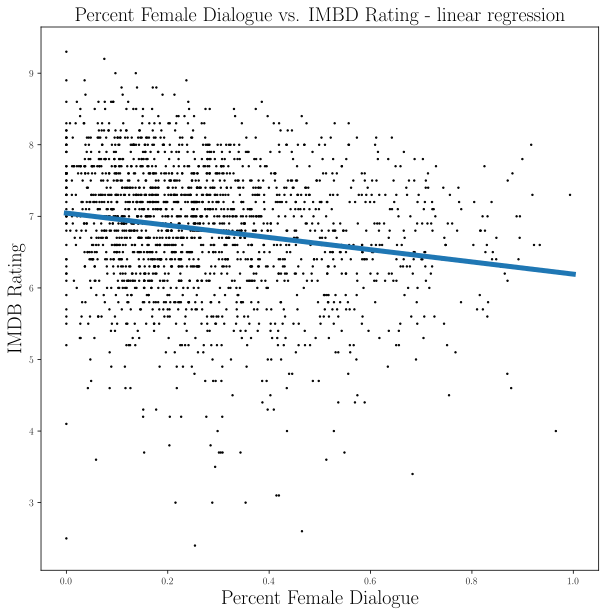

In [9]:
X = np.zeros((len(df_combined.f_percentage), 2))
X[:, 0] = np.ones(len(df_combined.f_percentage))
X[:, 1] = np.array(df_combined.f_percentage).flatten()
Y = np.array(df_combined.averageRating).flatten()
w = np.linalg.solve(X.T @ X, (X.T @ Y))

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(df_combined.f_percentage, df_combined.averageRating, ".k", ms=3)
ax.plot([0, 1], [w[0], w[0] + w[1]], "-", lw=5)

plt.ylabel("IMDB Rating", size=20)
plt.xlabel("Percent Female Dialogue", size=20)
plt.title("Percent Female Dialogue vs. IMBD Rating - linear regression", size=20)

plt.show();

We can see that this kind of analysis is dangerous if, instead of plotting rating against the female participation, we plot the rating against the length of the movie, and do the same analysis:

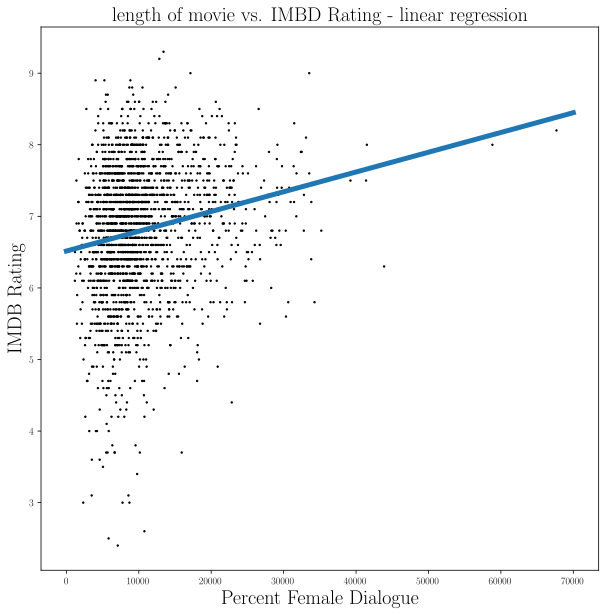

In [65]:
X = np.zeros((len(df_combined.words), 2))
X[:, 0] = np.ones(len(df_combined.words))
X[:, 1] = np.array(df_combined.words).flatten()
Y = np.array(df_combined.averageRating).flatten()
w = np.linalg.solve(X.T @ X, (X.T @ Y))

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(df_combined.words, df_combined.averageRating, ".k", ms=3)
ax.plot([0, 7e4], [w[0], w[0] + w[1] * 7e4], "-", lw=5)

plt.ylabel("IMDB Rating", size=20)
plt.xlabel("Percent Female Dialogue", size=20)
plt.title("length of movie vs. IMBD Rating - linear regression", size=20)
plt.show();

note that the curve is now affected strongly by just a few data points that are far away

Before moving on, think about how you *believe* this data may be causally related. Do people rank movies low because they contain women? Or do unpopular movies have a higher chance of containing many female characters? What is the most striking thing about the plots above: A potential relationship between female participation and rating, or isn't it rather the fact that the there are so few movies with majority female conversation?

In situations like this, it can be helpful to treat the data not as a supervised problem (i.e. assume, a priori, a functional relationship between two variables, such as female participation and rating) and instead consider it as an unsupervised problem: What is the joint distribution of movie scores, their length, and gender balance?

To do this in a simple fashion, make the following four plots:
1. make a scatter plot of the data itself $(X,Y)$
2. compute the 2d *joint* histogram of the data. This is an approximation to the joint $p(X,Y)$
3. compute histograms for the *marginals* $p(X)$ and $p(Y)$. Plot their outer product $q(X,Y) = p(X) \cdot p(Y)$. This is an estimate for what the joint *would* be if the two variables *were* independent. 
4. Do you think $p(X,Y)$ and $q(X,Y)$ differ significantly? To get a sense for strong the difference is, re-draw a random sample from $q(X,Y)$ with equally many points as the "training" data. Do you think it looks clearly different? Note that if this distribution does not look significantly different from the raw data, it is not unlikely that the score and female participation are in fact independent of each other.

[Text(0, 0.5, 'Movie Ratings'),
 Text(0.5, 0, '"Precentage of female speaking timing * 10"')]

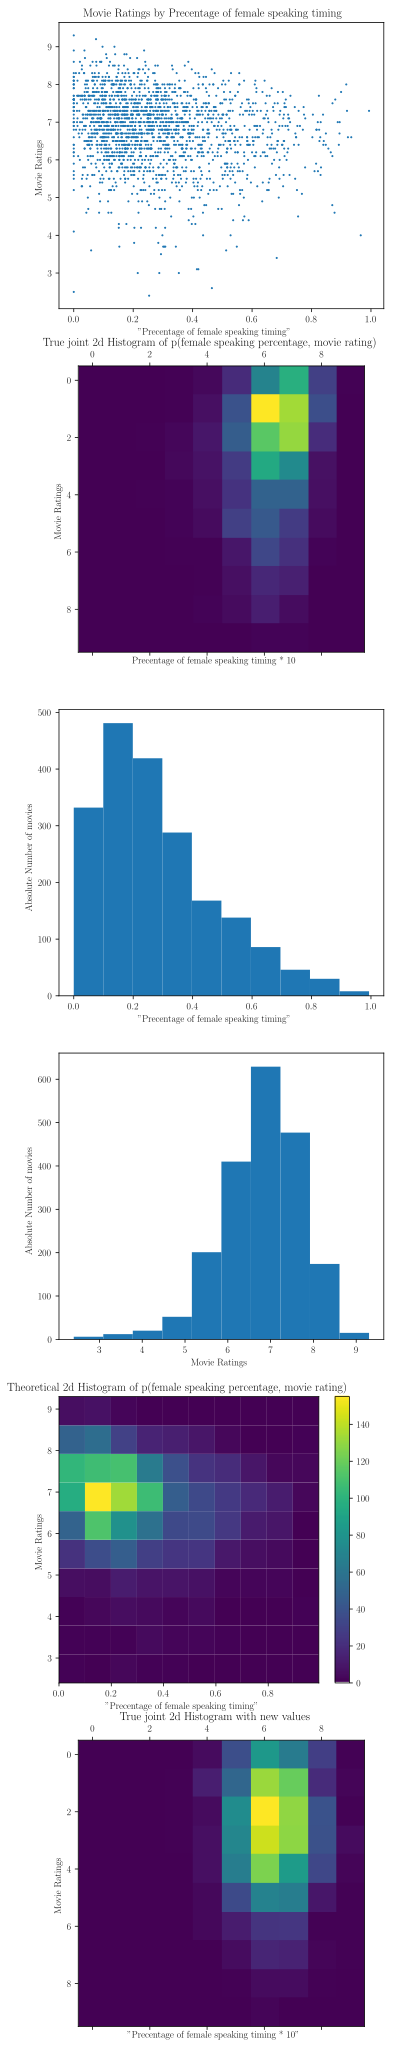

In [17]:
# Make a plot with four subplots showing task 1-4 from left to right
fig,axs=plt.subplots(6,1,figsize=(6,38))
axs[0].scatter(df_combined.f_percentage,df_combined.averageRating,s=1.5)
axs[0].set(xlabel='"Precentage of female speaking timing"',ylabel='Movie Ratings')
axs[0].set_title("Movie Ratings by Precentage of female speaking timing")
h=axs[4].hist2d(df_combined.f_percentage,df_combined.averageRating)
axs[4].set_title("Theoretical 2d Histogram of p(female speaking percentage, movie rating)")
axs[4].set(xlabel='"Precentage of female speaking timing"',ylabel='Movie Ratings')
fig.colorbar(h[3],ax=axs[4])
axs[2].hist(df_combined.f_percentage)
axs[2].set(xlabel='"Precentage of female speaking timing"',ylabel='Absolute Number of movies')
axs[3].hist(df_combined.averageRating)
axs[3].set(xlabel="Movie Ratings",ylabel='Absolute Number of movies')
#joint distribution 
joint_distribution=np.zeros((10,10))
for i in range(10):
    for j in range(10):
        joint_distribution[i][j]=df_combined[(df_combined["f_percentage"]<0.1*(i+1))&(df_combined["f_percentage"]>i*0.1)&(df_combined["averageRating"]<j+1)&(df_combined["averageRating"]>j)].count().title
        h2=axs[1].matshow(joint_distribution)
        axs[1].set_title("True joint 2d Histogram of p(female speaking percentage, movie rating)")
axs[1].set(xlabel="Precentage of female speaking timing * 10", ylabel ='Movie Ratings')
mean_averageRating=df_combined["averageRating"].mean()
mean_female_speaker=df_combined["f_percentage"].mean()
sd_averageRating=df_combined["averageRating"].std()
sd_female_speaker=df_combined["f_percentage"].std()
# Drawing randomly from the sample 

drawing_newdata=pd.DataFrame({"f_percentage":np.random.normal(loc=mean_female_speaker,scale=sd_female_speaker,size=df_combined.count().title),"averageRating":np.random.normal(loc=mean_averageRating,scale=sd_averageRating,size=df_combined.count().title)})

joint_distribution2=np.zeros((10,10))
for i in range(10):
    for j in range(10):
     joint_distribution2[i][j]=drawing_newdata[(drawing_newdata["f_percentage"]<0.1*(i+1))&(drawing_newdata["f_percentage"]>i*0.1)&(drawing_newdata["averageRating"]<j+1)&(drawing_newdata["averageRating"]>j)].count().f_percentage

h3=axs[5].matshow(joint_distribution2)
axs[5].set_title("True joint 2d  Histogram with new values")
axs[5].set(xlabel='"Precentage of female speaking timing * 10"',ylabel='Movie Ratings')





# Part V: What have we learned?

The re-sampling analysis indeed seems to suggest a *slight* dependence of the score on the percentage of female speakers. Note that this is only a statement about statistical dependence. The theory of causality (specifically Reichenbach's principle of common cause, which is beyond the scope of the lecture) posits that such a relationship implies a causal *relationship* between the two variables. But not that the relationship is direct, or its direction. In particular, there may be a *confounder*: A hidden cause for both the scores and the gender speech ratio. What might be such a confounder? Come up with at least one hypothesis. Write down your hypothesis. If you want to (optional), try to collect evidence for your hypothesis and present it in the tutorial. 

In [ ]:
# write down your hypothesis & investigate it if you want to

# TODO